# <center>Curso de Auditoria de Dados

## <center>Flávio Brito

---

# Introdução a Validação de Dados

O pacote validate destina-se a fazer a verificação de seus dados de foma fácil e reprodutível. O pacote permite testar seus dados contra regras predefinidas de forma direta ou através de conjuntos de regras importadas de arquivos estruturados ou de formato livre
Desta forma, permite-se ao auditori investigar e visualizar os resultados de uma etapa de validação de dados.


‎Existem alguns substantivos relacionados à infra-estrutura oferecida pelo validar:


* <b>data set:</b> seus dados;
* <b>validator:</b> um objeto representando um conjunto de regras que os seus dados devem satisfazer;
* <b>confrontation:</b> um objeto representando os resultados de um confrontamento das regras com seus dados

Existe um verbo denominado:

<b>confront</b>: avalia a validação das regras no contexto de um ou mais conjunto de dados

‎Aqui está um exemplo demonstrando o fluxo de trabalho típico‎

In [14]:
data(women)
summary(women)

     height         weight     
 Min.   :58.0   Min.   :115.0  
 1st Qu.:61.5   1st Qu.:124.5  
 Median :65.0   Median :135.0  
 Mean   :65.0   Mean   :136.7  
 3rd Qu.:68.5   3rd Qu.:148.0  
 Max.   :72.0   Max.   :164.0  

In [15]:
head(women)

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


‎O processo de validação de dados visa verificar se um conjunto de dados reúne presunções ou expectativas coincidem com os dados analisados. 
Através do pacote validate isso fica mais rápido e fácil de verificar. Vejamos:

In [10]:
install.packages("validate", repos="https://cloud.r-project.org")

also installing the dependency 'settings'



package 'settings' successfully unpacked and MD5 sums checked
package 'validate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\flavi\AppData\Local\Temp\RtmpeSFrtT\downloaded_packages


In [11]:
library(validate)

Warning message:
"package 'validate' was built under R version 3.3.2"

Vamos construir uma regra de validação para ser aplicada no data frame women:

In [13]:
cf <- check_that(women, height > 0, weight > 0, height/weight > 0.5)
summary(cf)

,rule,items,passes,fails,nNA,error,warning,expression
1,V1,15,15,0,0,FALSE,FALSE,height > 0
2,V2,15,15,0,0,FALSE,FALSE,weight > 0
3,V3,15,2,13,0,FALSE,FALSE,height/weight > 0.5


O <b>check_that</b> retorna um objeto que contém todos os tipos de informações sobre os resultados da validação.‎A maneira mais fácil para verificar os resultados 
é através da função <b>summary</b> que irá retornar um data frame com as seguintes informações:

‎Quantos dados itens foram verificados contra cada regra‎
‎Quantos itens passaram, falharam ou resultaram em ‎NA
‎Se a seleção resultou em um erro (não pôde ser executada) ou deu um erro‎
‎A expressão que na verdade foi avaliada para executar a verificação.‎

Esta mesma informação pode ser vista graficamente

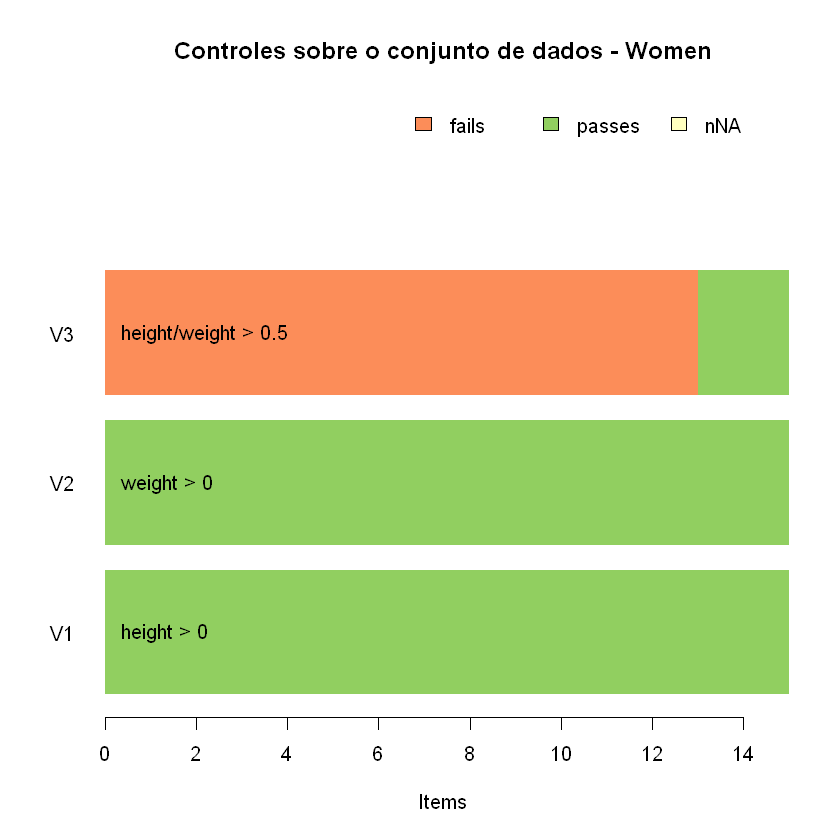

In [16]:
barplot(cf,main="Controles sobre o conjunto de dados - Women")

# Objetos de Validação

São usados para armazenar, investigar e manipular o conjunto de regras

In [18]:
v <- validator(height > 0, weight > 0, height/weight > 0)
v

Object of class 'validator' with 3 elements:
 V1: height > 0
 V2: weight > 0
 V3: height/weight > 0

O objeto de validação armazena a regra e a associa nomes a ela para futura referência. Para verificar isso, basta que confrontemos os dados
com as regras de validação que definimos:

In [19]:
cf <- confront(women,v)
cf

Object of class 'validation'
Call:
    confront(x = women, dat = v)

Confrontations: 3
With fails    : 0
Warnings      : 0
Errors        : 0

O objeto <b>cf</b> contém os resultado do dado verificado em <b>women</b> contra o que se definiu em v. O fato de não se ter nem 
avisos(warnings) nem erros indica que cada regra pôde ser avaliada com sucesso.

‎Agora, suponha que esperamos que o IMC (peso dividido pela altura ao quadrado) de cada item deve ser inferior a 23. Precisamos expressar o peso em quilogramas e a altura em metros, o IMC será:‎

$
\begin{equation} 
IMC = \frac{peso\times0.45359}{(altura\times0.0254)^2}
\end{equation}
$


‎Além disso, suponha que nós suspeitamos que o IMC médio está entre 22 e 22,5. Vamos criar outro objeto validador que primeiro calcula o IMC e depois testar se a valores de IMC de acordo com nossa suspeita.

In [20]:
v <- validator(
  IMC := (weight*0.45359)/(height*0.0254)^2
  , height > 0
  , weight > 0
  , IMC < 23
  , mean(IMC) > 22 & mean(IMC) < 22.5
)
v

Object of class 'validator' with 5 elements:
 V1: `:=`(IMC, (weight * 0.45359)/(height * 0.0254)^2)
 V2: height > 0
 V3: weight > 0
 V4: IMC < 23
 V5: mean(IMC) > 22 & mean(IMC) < 22.5

A verificação fica fácil agora:

In [21]:
cf <- confront(women,v)
summary(cf)

,rule,items,passes,fails,nNA,error,warning,expression
1,V2,15,15,0,0,FALSE,FALSE,height > 0
2,V3,15,15,0,0,FALSE,FALSE,weight > 0
3,V4,15,10,5,0,FALSE,FALSE,((weight * 0.45359)/(height * 0.0254)^2) < 23
4,V5,1,0,1,0,FALSE,FALSE,mean(((weight * 0.45359)/(height * 0.0254)^2)) > 22 & mean(((weight * 0.45359)/(height * 0.0254)^2)) < 22.5


## Objetos de confronto


‎O resultado do confrontamento de um objeto de validação com um conjunto de dados é um objeto de classe <b>confrontation</b>

* <b>summary</b>: resumir a saída; Retorna um data.frame
* <b>aggregate</b>: a validação de agregação de várias maneiras
* <b>sort</b>: agregação e classificação de várias maneiras
* <b>values</b>: ‎Obtém os valores em uma matriz ou uma lista, se as regras têm estrutura de dimensão diferente da saída‎
* <b>errors</b>: Recupera mensagens de erro obtidas durante a confrontação
* <b>warnings</b>: Recupera as mensagens de aviso obtidas durante o confrontamento.

‎Por padrão os agregados são produzidos pela regra.‎

In [23]:
cf <- check_that(women, height>0, weight>0,height/weight < 0.5)
aggregate(cf) 

,npass,nfail,nNA,rel.pass,rel.fail,rel.NA
V1,15,0,0,1,0,0
V2,15,0,0,1,0,0
V3,12.0,3.0,0.0,0.8,0.2,0.0


‎Para agregar por registro use by="record"

In [24]:
head(aggregate(cf,by='record'))

,npass,nfail,nNA,rel.pass,rel.fail,rel.NA
1,2.0000000,1.0000000,0.0000000,0.6666667,0.3333333,0.0000000
2,2.0000000,1.0000000,0.0000000,0.6666667,0.3333333,0.0000000
3,2.0000000,1.0000000,0.0000000,0.6666667,0.3333333,0.0000000
4,3,0,0,1,0,0
5,3,0,0,1,0,0
6,3,0,0,1,0,0


‎Os resultados agregados podem ser classificados automaticamente. Os registros com mais violações ou regras que mais violaram são ordenadas pelos maiores valores.

In [25]:
sort(cf)

,npass,nfail,nNA,rel.pass,rel.fail,rel.NA
V3,12.0,3.0,0.0,0.8,0.2,0.0
V1,15,0,0,1,0,0
V2,15,0,0,1,0,0


Os objetos de confrontamento podem ser filtrados com um único [], como os vetores, a fim  de obter um sub-objeto somente referente a regra selecionada.  

In [27]:
summary(cf[c(1,3)])

,rule,items,passes,fails,nNA,error,warning,expression
1,V1,15,15,0,0,FALSE,FALSE,height > 0
2,V3,15,12,3,0,FALSE,FALSE,height/weight < 0.5


### Opções de Confrontamento

‎Por padrão, todos os erros e avisos são detectados quando as regras de validação são confrontadas com dados‎. ‎Este pode ser desligado, 
definindo a opção <b>raise</b> para "errors" ou "all".

In [31]:
v <- validator(heite > 0, weight>0)
summary(confront(women, v))

,rule,items,passes,fails,nNA,error,warning,expression
1,V1,0,0,0,0,TRUE,FALSE,heite > 0
2,V2,15,15,0,0,FALSE,FALSE,weight > 0


Enquanto aqui ele é gerado imediatamente

In [32]:
confront(women, v, raise='all')

ERROR: Error in eval(expr, envir, enclos): objeto 'heite' não encontrado


# Investigando o Validador de Objetos

Ele armazenam um conjunto de regras, opcionalmente com alguns metadados por regra. Atualmente, as funções a seguir podem ser usadas para obter ou definir metadados‎:

* <b>origin</b>: Onde a regra foi definida?
* <b>names</b> : O nome por regra
* <b>created</b> : Qaundo a regra fo criada?
* <b>label</b> : Descrição curta da regra
* <b>description</b>: Descrição longa da regra

Os nomes das regras podem ser definidos via linha de comando, ao definir um objeto do validador.‎


In [34]:
v <- validator(rat = height/weight > 0.5, htest=height>0, wtest=weight > 0)
names(v)

[1] "rat"   "htest" "wtest"

Tente também:

In [35]:
names(v)[1] <- "ratio"
v

Object of class 'validator' with 3 elements:
 ratio: height/weight > 0.5
 htest: height > 0
 wtest: weight > 0

Algumas informações gerais são obtidas com: summary

In [36]:
summary(v)

,block,nvar,rules,linear
1,1,2,3,2


O número de regras pode ser obtido via <b>length</b>

In [37]:
length(v)

[1] 3

Com <b> variables</b> é posssível obter as variáveis que ocorrem por regra, ou sobre todas as regras. 

In [38]:
variables(v)

[1] "height" "weight"

In [39]:
variables(v,as="matrix")

,height,weight
ratio,TRUE,TRUE
htest,TRUE,FALSE
wtest,FALSE,TRUE


O validador de objetos pode ser obtido via:

In [40]:
v[c(1,3)]

Object of class 'validator' with 2 elements:
 ratio: height/weight > 0.5
 wtest: weight > 0
Options:
raise: none; lin.eq.eps: 1e-08; na.value: NA; sequential: TRUE; na.condition: FALSE

In [41]:
v['ratio','wtest']

Object of class 'validator' with 1 elements:
 ratio: height/weight > 0.5
Options:
raise: none; lin.eq.eps: 1e-08; na.value: NA; sequential: TRUE; na.condition: FALSE

Ou para retornar um único valor

In [42]:
v[[1]]


Object of class rule.
 expr       : height/weight > 0.5 
 name       : ratio 
 label      :  
 description:  
 origin     : command-line 
 created    : 2016-12-01 17:11:08